In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


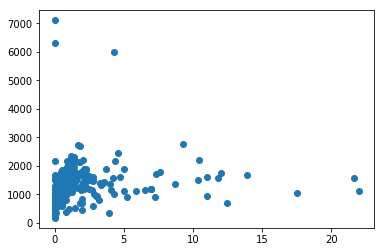

In [2]:
import xml.etree.ElementTree as ET, urllib, gzip, io
url = "https://github.com/OpenExoplanetCatalogue/oec_gzip/raw/master/systems.xml.gz"                          
oec = ET.parse(gzip.GzipFile(fileobj=io.BytesIO(urllib.urlopen(url).read()))) 

mass = []  
radius = []
age = []
temp = []
for planet in oec.findall(".//planet"):
    a = planet.findtext("mass")
    b = planet.findtext("radius")
    c = planet.findtext("temperature")
    d = planet.findtext("age")
    if (a and b and c):
        mass.append(float(a))
        radius.append(float(b))
        temp.append(float(c))
        #age.append(float(d))

plt.scatter(mass,temp)

In [9]:
par='name'

S1=[]    #C
S2=[]    #D
P=[]      #B
U=[]      #A

for system in oec.findall('./system'):
    binary = system.findall('binary')
    if binary: #sistema binary
        
        binary = binary[0]
        planet = binary.findall('planet')
        if planet: #sistema circunbinario
            for star in binary.findall('star'):
                s = star.findtext(par)
                P.append(s)
                
        else: #sistema circunestelar
            
            for star in binary.findall('star'): #reviso las estrellas
                s = star.findtext(par)
                cond = star.findtext('planet')
                if cond: #estrella con planeta
                    S1.append(s)
                else: #estrella sin planeta
                    S2.append(s)
                    
            for sub_binary in binary.findall('binary'): #binarias dentro de binarias
                for star in sub_binary.findall('star'):
                    s = star.findtext(par)
                    cond = star.findtext('planet')
                    if cond: #estrella con planeta
                        S1.append(s)
                    else: #estrella sin planeta
                        S2.append(s)
                        
    else: #sistema unitario
        for star in system.findall('star'):
                s = star.findtext(par)
                U.append(s)

In [10]:
S1[0:11]

['16 Cygni B',
 '2M 044144',
 '30 Ari B',
 '51 Eri',
 '55 Cancri A',
 '83 Leonis B',
 '91 Aquarii A',
 'alf Tau',
 'Proxima Centauri',
 'Alpha Centauri B',
 'EPIC 201208431']

In [11]:
S2[0:20]

['16 Cygni A',
 '16 Cygni C',
 '2M0441+2301 Aa',
 '2M0441+2301 Ab',
 '30 Ari Aa',
 '30 Ari Ab',
 '30 Ari C',
 'GJ 3305 A',
 'GJ 3305 B',
 '55 Cancri B',
 '83 Leonis A',
 '91 Aquarii B',
 '91 Aquarii C',
 'alf Tau B',
 'Alpha Centauri A',
 'EPIC 201208431 B',
 'EPIC 201384232 B',
 'EPIC 201403446 B',
 'EPIC 201549860 B',
 'EPIC 201629650 B']

In [12]:
P[0:3]

['2M 1938+4603 A', '2M 1938+4603 B', '2MASS J02495639-0557352 A']

In [13]:
U[:3]

['11 Com', '11 UMi', '14 And']